In [88]:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'], skiprows=1)
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [89]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
#print(load_boston()['DESCR'])

        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [44]:
import pandas_profiling

In [14]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
data.shape

(506, 14)

In [21]:
data.query('AGE == 100').shape # значит не выброс, похоже район, где много старых зданий, исторический центр к примеру

(43, 14)

In [45]:
data.profile_report()

Просмотрел детально признак CRIM, увидел, что максимальное число(88.97) сильно отличается от среднего(3.61). Похоже на выбросы. Решил сделать фильтр <= 20, в этом случае убирается 18 домов. Всего 504, удаление допустимо. Больше удалять не хочется.

In [90]:
data.query('CRIM >= 15').shape

(30, 14)

In [91]:
data = data.query('CRIM <= 20')

Что мы видим из профайлера:
1) пропусков в данных нет
Смотрим распределения.
AGE - много домов, где расположены рядом старые постройки, исторический центр, к примеру.(Распределение - Exponential)
B - афроамериканцев много.(Распределение - Exponential)
CHAS - доступ к воде. Если доступ к воде есть, то дома дороже. Естественно домов с видом меньше, чем всех остальных. Перекос логичен.
Распределение бернулли.Так же вес у него хороший получился, значит на результат влияет.
DIS - Логнормальное распределение
LSTAT,MEDV, NOX, RM - похоже на нормальное распределение
ZN - много нулей, да, но это значит, что большинство домов не имееют большую придомовую территорию.

проанализировав репорт, посчитал что выбросов нет.
из репорта также видно, что TAX сильно коррелирует c RAD, поэтому можем удалить этот признак(RAD).

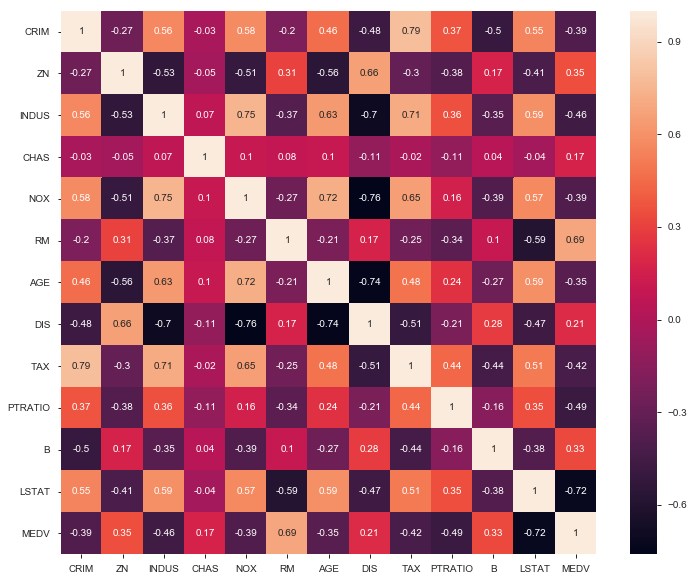

In [46]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
'LSTAT', 'PTRATIO', 'DIS', 'RAD', 'AGE'

In [92]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [93]:
data.shape

(488, 14)

In [94]:
X_columns = data.columns[:-1]
Y_column = data.columns[-1]
X_columns, Y_column

(Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT'],
       dtype='object'), 'MEDV')

In [95]:
X = data[X_columns]
Y = data[Y_column]

В след действии я разделяю датасет на трейн 80 проц и тест 20 проц.

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=46)

In [97]:
X.shape

(488, 13)

Ниже показано разделение в количественном соотношении.

In [98]:
X_train.shape, X_test.shape

((390, 13), (98, 13))

#Ниже, провел эксперимент без удаления каких либо признаков.

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

estimator = LinearRegression()
estimator.fit(X_train, Y_train)
print('Weights: {}'.format(estimator.coef_))


y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(Y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(Y_test, y_pred)))
print("MAE: \t", mean_absolute_error(Y_test, y_pred))

Weights: [-9.23209786e-02  3.94014548e-02  1.72417211e-02  2.66675551e+00
 -1.70884643e+01  4.38885452e+00 -3.21516032e-03 -1.50190383e+00
  2.53479220e-01 -8.75216678e-03 -8.88647307e-01  1.21681123e-02
 -4.97240773e-01]
R2: 	 0.7896039131538266
RMSE: 	 4.021515759283501
MAE: 	 3.130775082976684


Первый эксперимент удаляем RAD, который сильно коррелирует с TAX

In [100]:
data1 = data.drop('RAD', axis=1)

In [102]:
X_columns = data1.columns[:-1]
Y_column = data1.columns[-1]
X_columns, Y_column
X = data1[X_columns]
Y = data1[Y_column]

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=46)

In [104]:
X_train.shape, X_test.shape

((390, 12), (98, 12))

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

estimator = LinearRegression()
estimator.fit(X_train, Y_train)
print('Weights: {}'.format(estimator.coef_))


y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(Y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(Y_test, y_pred)))
print("MAE: \t", mean_absolute_error(Y_test, y_pred))

Weights: [ 1.08853535e-01  3.26177011e-02 -2.58791343e-02  3.00785283e+00
 -1.54072214e+01  4.55132495e+00 -4.50742511e-03 -1.46377157e+00
 -1.67387899e-04 -8.10971610e-01  1.23381046e-02 -5.20346849e-01]
R2: 	 0.769675643871
RMSE: 	 4.207662319033923
MAE: 	 3.2740416687110736


Получили чуть большую ошибку.

Проведем эксперимент без TAX но с RAD. Для этого вернем датасет к изначальному виду.

In [106]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data = data.query('CRIM <= 20')

In [107]:
data2 = data.drop('TAX', axis=1)

In [108]:
X_columns = data2.columns[:-1]
Y_column = data2.columns[-1]
X_columns, Y_column
X = data2[X_columns]
Y = data2[Y_column]

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=46)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

estimator = LinearRegression()
estimator.fit(X_train, Y_train)
print('Weights: {}'.format(estimator.coef_))


y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(Y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(Y_test, y_pred)))
print("MAE: \t", mean_absolute_error(Y_test, y_pred))

Weights: [-9.20984327e-02  3.23408364e-02 -3.95698410e-02  2.85829611e+00
 -1.79031756e+01  4.46545476e+00 -4.05415210e-03 -1.51742300e+00
  1.28798320e-01 -9.13399649e-01  1.24272007e-02 -4.94551838e-01]
R2: 	 0.773456101051988
RMSE: 	 4.172987955566099
MAE: 	 3.248898313615963


Получили результаты чуть лучше чем с TAX, но разница в ошибках несущественная. Вывод: выходит раз разница в ошибке небольшая, то не важно какой признак удалить в этом случае TAX or RAD (при их корреляции друг с другом).

Выборочно удалим еще несколько признаков и посмотрим на результат.

In [111]:
data_reduced = data2.drop(['RM', 'CHAS', 'DIS'], axis=1)
data_reduced.head()

,CRIM,ZN,INDUS,NOX,AGE,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,65.2,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,78.9,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,61.1,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,45.8,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,54.2,3,18.7,396.90,5.33,36.2


In [112]:
X_columns = data_reduced.columns[:-1]
Y_column = data_reduced.columns[-1]
X_columns, Y_column

(Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'RAD', 'PTRATIO', 'B', 'LSTAT'], dtype='object'),
 'MEDV')

In [113]:
X = data_reduced[X_columns]
Y = data_reduced[Y_column]

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=46)

In [115]:
X_train.shape, X_test.shape

((390, 9), (98, 9))

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

estimator = LinearRegression()
estimator.fit(X_train, Y_train)
print('Weights: {}'.format(estimator.coef_))


y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(Y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(Y_test, y_pred)))
print("MAE: \t", mean_absolute_error(Y_test, y_pred))

Weights: [ 1.35467946e-01 -2.16087298e-03  1.14464145e-02 -1.33443013e+01
  6.90964543e-02  1.47072406e-01 -1.36186842e+00  9.22892923e-03
 -9.00445211e-01]
R2: 	 0.7208219100460079
RMSE: 	 4.632459292664986
MAE: 	 3.527382339767515


Index(['CRIM', 'CHAS', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')

Поэкспериментировал с признаками. Получил чуть большую ошибку, чем при использовании всех признаков.

Еще эксперимент

In [117]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data = data.query('CRIM <= 20')

In [118]:
data_last = data.drop(['LSTAT', 'PTRATIO', 'DIS', 'RAD', 'AGE'], axis=1)
data_last.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,TAX,B,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,296,396.90,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,242,396.90,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,242,392.83,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,222,394.63,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,222,396.90,36.2


In [119]:
X_columns = data_last.columns[:-1]
Y_column = data_last.columns[-1]
X_columns, Y_column

(Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'TAX', 'B'], dtype='object'),
 'MEDV')

In [120]:
X = data_last[X_columns]
Y = data_last[Y_column]

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=46)

In [122]:
X_train.shape, X_test.shape

((390, 8), (98, 8))

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

estimator = LinearRegression()
estimator.fit(X_train, Y_train)
print('Weights: {}'.format(estimator.coef_))


y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(Y_test, y_pred))
print("RMSE: \t", np.sqrt(mean_squared_error(Y_test, y_pred)))
print("MAE: \t", mean_absolute_error(Y_test, y_pred))

Weights: [-1.38364206e-01  2.33506722e-02 -5.40741624e-02  4.09613107e+00
 -9.34468859e-01  7.85728570e+00 -3.82370527e-03  1.82598891e-02]
R2: 	 0.6186196177006534
RMSE: 	 5.414397303656863
MAE: 	 3.7218728167088564


Получили большую ошибку. Меньшая ошибка получилась при удалении только одного признака или RAD или TAX